# Comparing Heart Rate while Running and Biking: Histogram, Lineplot, Autocorrelation

In [1]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import panel as pn
from hvplot.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

pn.extension()

In [5]:
df_filtered = pd.read_csv('./csv/df_filtered.csv')
autocorr_bike = pd.read_csv('./csv/df_autocorr_bike.csv')
autocorr_run = pd.read_csv('./csv/df_autocorr_run.csv')

In [8]:
autocorr_run.head()

,Unnamed: 0,autocorr_run
0,0,0.774450
1,1,0.773151
2,2,0.750501
3,3,0.771016
4,4,0.804433


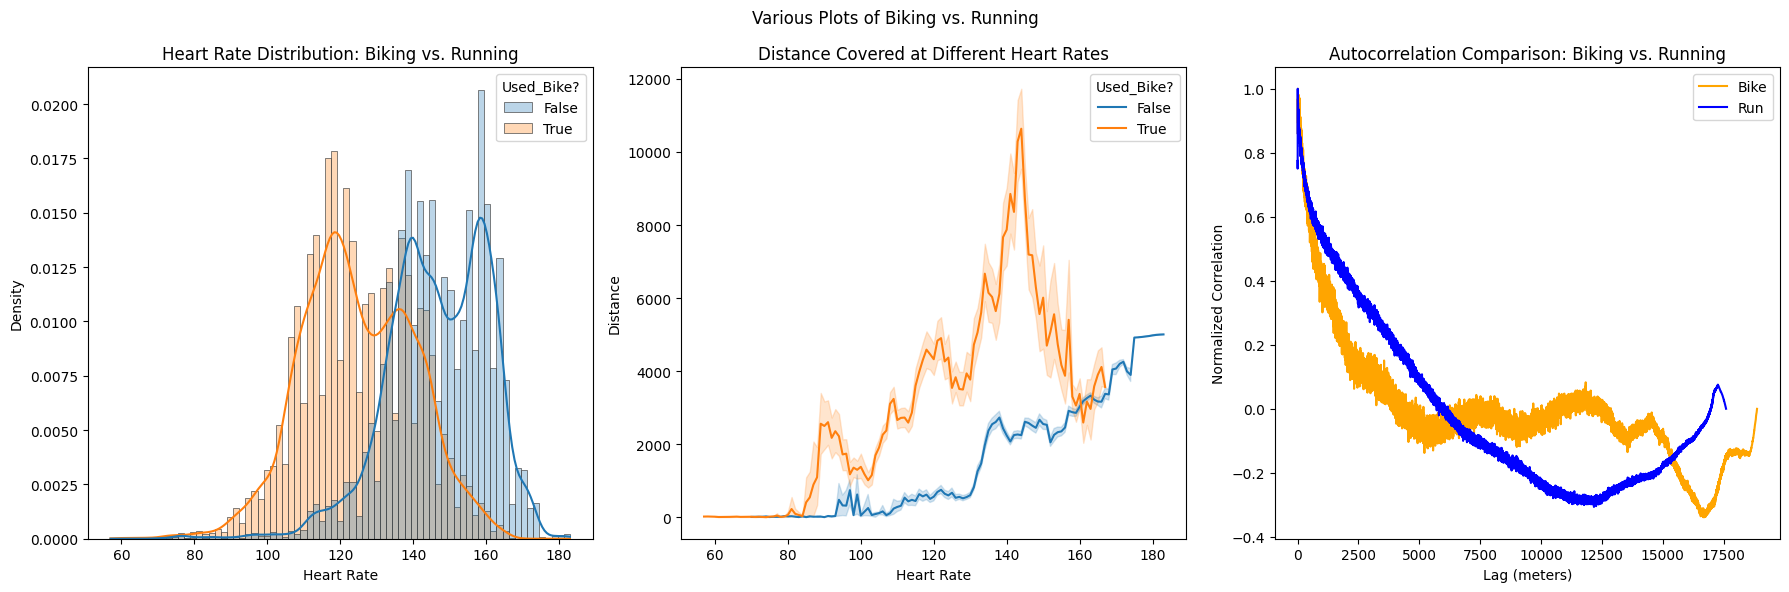

In [17]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 3, 1)

ax.set_title('Heart Rate Distribution: Biking vs. Running')
ax.set_xlabel('Heart Rate')
sns.histplot(
    df_filtered,
    x="heart_rate", hue="Used_Bike?",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    ax=ax,
    kde=True,
    alpha=0.3,
    stat='density'
)
ax_line = fig.add_subplot(1, 3, 2)
ax_line.set_title('Distance Covered at Different Heart Rates')
ax_line.set_xlabel('Heart Rate')
ax_line.set_ylabel('Distance')
sns.lineplot(data=df_filtered, x='heart_rate', y='distance', hue='Used_Bike?', ax=ax_line)

ax_corr = fig.add_subplot(1, 3, 3)
plt.plot(autocorr_bike['autocorr_bike'], label='Bike', c='orange')
plt.plot(autocorr_run['autocorr_run'], label="Run", c='blue')
plt.xlabel('Lag (meters)')
plt.ylabel('Normalized Correlation')
plt.title('Autocorrelation Comparison: Biking vs. Running')
plt.legend()

fig.suptitle('Various Plots of Biking vs. Running')
plt.tight_layout()
plt.show()


